In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [87]:
#df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Train_cleared_!!!!!!!!.csv')

In [3]:
df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Train_cleared_fillna.csv')

In [2]:
df_T=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Test_cleared_!!!!!!!!.csv')

In [88]:
df=df.filter(regex='^(?!.*Unnamed).*$')

In [5]:
df_T=df_T.filter(regex='^(?!.*Unnamed).*$')

================================================================

**Обучающий_набор**

In [89]:
array = df.values
array

array([[ 0.,  1., 67., ...,  1.,  6.,  2.],
       [ 0.,  0., 26., ...,  3.,  6.,  1.],
       [ 1.,  0., 19., ...,  4.,  4.,  4.],
       ...,
       [ 1.,  0., 35., ...,  4.,  4.,  4.],
       [ 0.,  0., 27., ...,  4.,  6.,  2.],
       [ 1.,  1., 37., ...,  3.,  4.,  2.]])

In [90]:
X = array[:,0:9]
Y = array[:,9]

In [20]:
X

array([[ 0.,  1., 67., ...,  3.,  1.,  6.],
       [ 0.,  0., 26., ...,  3.,  3.,  6.],
       [ 1.,  0., 19., ...,  3.,  4.,  4.],
       ...,
       [ 1.,  0., 35., ...,  3.,  4.,  4.],
       [ 0.,  0., 27., ...,  3.,  4.,  6.],
       [ 1.,  1., 37., ...,  2.,  3.,  4.]])

In [21]:
Y

array([2., 1., 4., ..., 4., 2., 2.])

==============================================================

**Тестовый_набор**

In [8]:
array_T = df.values
array_T

array([[ 1.,  0., 18., ...,  2.,  6.,  1.],
       [ 1.,  1., 18., ...,  4.,  6.,  1.],
       [ 0.,  0., 19., ...,  3.,  4.,  1.],
       ...,
       [ 0.,  1., 89., ...,  1.,  6.,  4.],
       [ 1.,  1., 89., ...,  2.,  6.,  4.],
       [ 0.,  1., 89., ...,  2.,  6.,  4.]])

In [9]:
XX = array_T[:,0:9]
YY = array_T[:,9]

In [12]:
XX

array([[ 1.,  0., 22., ...,  3.,  4.,  4.],
       [ 0.,  1., 67., ...,  3.,  1.,  6.],
       [ 1.,  1., 67., ...,  1.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  3.,  1.,  6.],
       [ 0.,  0., 27., ...,  3.,  4.,  6.],
       [ 1.,  1., 37., ...,  2.,  3.,  4.]])

In [13]:
YY

array([4., 2., 2., ..., 4., 2., 2.])

In [ ]:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [20]:
df.columns

Index(['Пол', 'Семейное_положение', 'Возраст', 'Высшее_образование',
       'Профессия', 'Опыт_работы', 'Уровень_расходов', 'Размер_семьи',
       'Анонимная_категория', 'Целевая_категория'],
      dtype='object')

In [10]:
df.Целевая_категория.unique()

array([4, 2, 3, 1], dtype=int64)

In [20]:
df

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,1,0.0,22,0.0,2.0,1.0,3,4.0,4.0,4
1,0,1.0,67,1.0,4.0,1.0,3,1.0,6.0,2
2,1,1.0,67,1.0,6.0,0.0,1,2.0,6.0,2
3,1,1.0,56,0.0,1.0,0.0,2,2.0,6.0,3
4,1,0.0,32,1.0,2.0,1.0,3,3.0,6.0,3
...,...,...,...,...,...,...,...,...,...,...
6660,1,1.0,41,1.0,1.0,0.0,1,5.0,6.0,2
6661,1,0.0,35,0.0,7.0,3.0,3,4.0,4.0,4
6662,0,0.0,33,1.0,2.0,1.0,3,1.0,6.0,4
6663,0,0.0,27,1.0,2.0,1.0,3,4.0,6.0,2


# **1. Метод k-средних**

In [91]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

In [92]:
# Описываем модель
model = KMeans(n_clusters=2)

In [93]:
# Проводим моделирование
result = model.fit(X)

In [94]:
# Предсказание на единичном примере
predicted_label = model.predict([[1,0.0,22,0.0,2.0,1.0,3,4.0,4.0]])
predicted_label

array([0])

In [95]:
# Предсказание на всем наборе данных
all_predictions = model.predict(X)#df.iloc[:,:-1])
#all_predictions.unique()

In [96]:
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[0]
[1 0 0 ... 0 0 0]


In [97]:
all_predictions

array([1, 0, 0, ..., 0, 0, 0])

In [98]:
df_KA_knn = df

In [99]:
df_KA_knn['KA_knn'] = pd.Series(all_predictions, index=df_KA_knn.index)

In [100]:
df_KA_knn

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория,KA_knn
0,0,1.0,67,1.0,4.0,1.0,3,1.0,6.0,2,1
1,0,0.0,26,1.0,4.0,1.0,3,3.0,6.0,1,0
2,1,0.0,19,0.0,2.0,4.0,3,4.0,4.0,4,0
3,0,1.0,58,0.0,5.0,0.0,3,1.0,3.0,2,1
4,0,0.0,41,0.0,2.0,1.0,3,2.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
5722,1,1.0,65,0.0,1.0,0.0,2,2.0,6.0,3,1
5723,1,1.0,41,1.0,1.0,0.0,1,5.0,6.0,2,0
5724,1,0.0,35,0.0,7.0,3.0,3,4.0,4.0,4,0
5725,0,0.0,27,1.0,2.0,1.0,3,4.0,6.0,2,0


<AxesSubplot:>

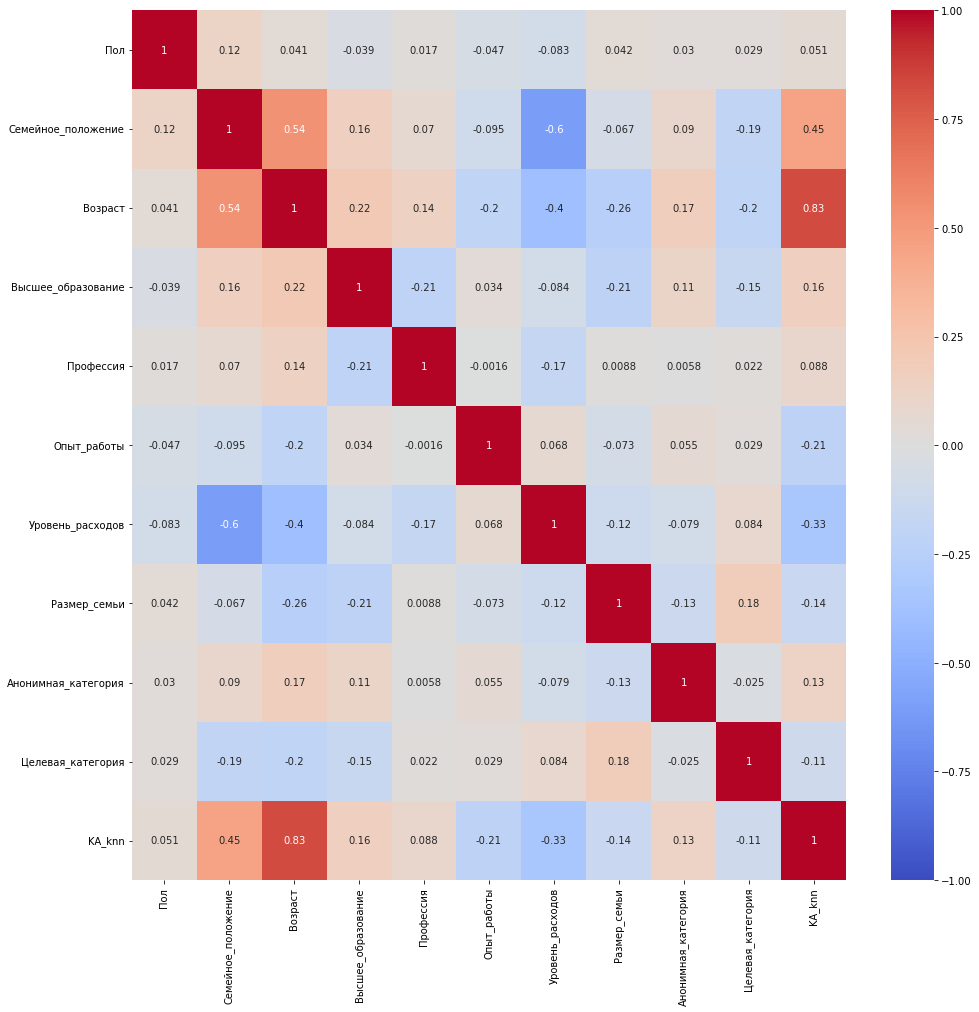

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 16))

sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [28]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 4].KA_knn.value_counts()

2    1525
0     412
1     180
3     151
Name: KA_knn, dtype: int64

In [29]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 3].KA_knn.value_counts()

3    795
0    580
1    302
2    293
Name: KA_knn, dtype: int64

In [30]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 2].KA_knn.value_counts()

0    683
3    608
1    293
2    274
Name: KA_knn, dtype: int64

In [31]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 1].KA_knn.value_counts()

0    780
2    503
3    384
1    304
Name: KA_knn, dtype: int64

# **Графическа часть соответствия:**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

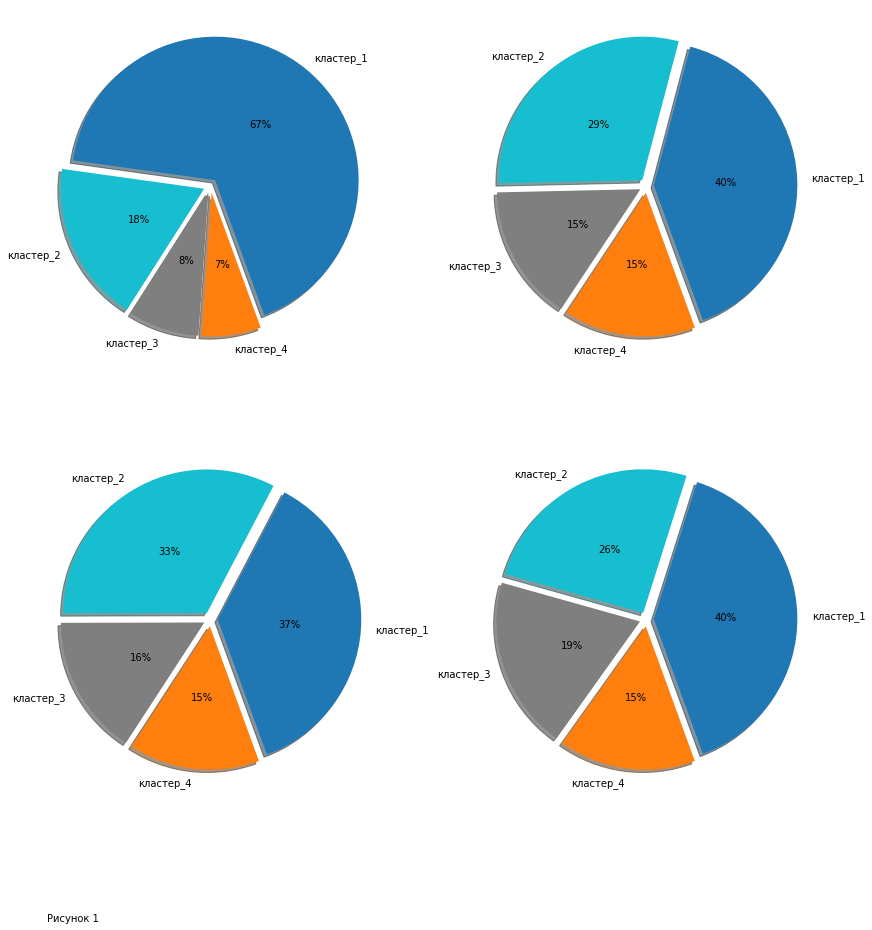

In [33]:
fg = plt.figure(figsize=(12,12),constrained_layout=True) # задаем рамку
gs = fg.add_gridspec(2,2) # задаем квадраты в рамке
q = fg.add_subplot(gs[0,0]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 4].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )
# Название рисунка
plt.figtext(0.05, -0.1, 'Рисунок 1')

#_________________________________________________________________________________________
q = fg.add_subplot(gs[0,1]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 3].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


#_________________________________________________________________________________________
q = fg.add_subplot(gs[1,0]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 2].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


#_________________________________________________________________________________________
q = fg.add_subplot(gs[1,1]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 1].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


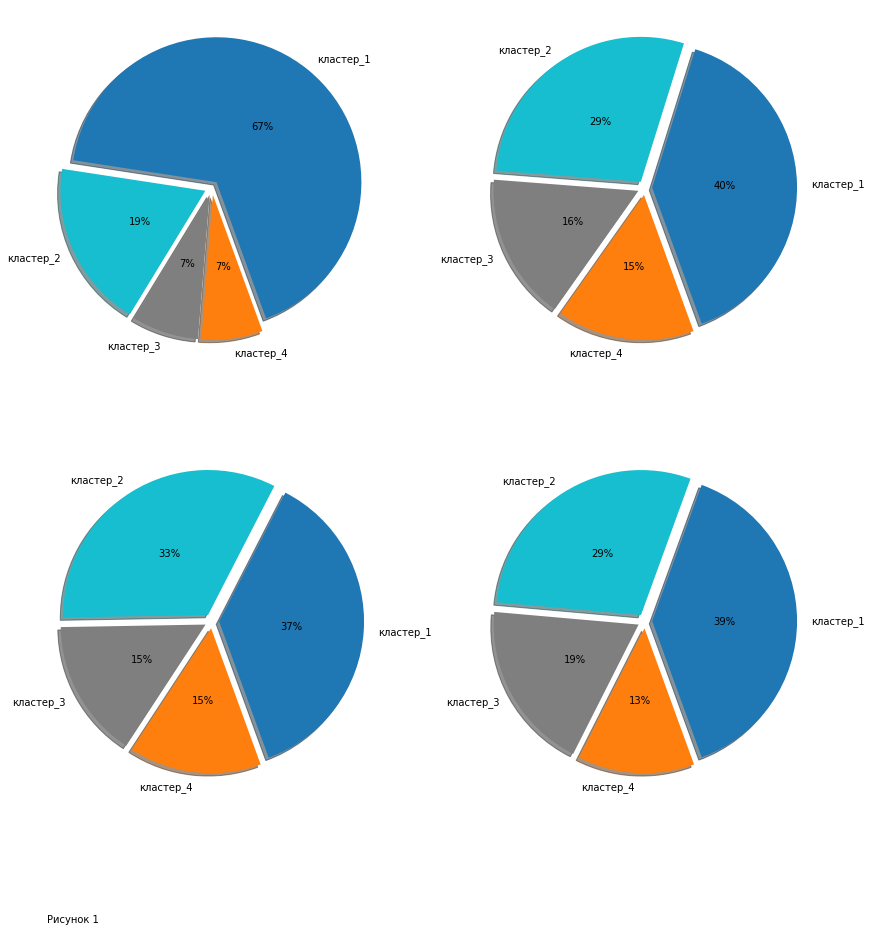

In [26]:
fg = plt.figure(figsize=(12,12),constrained_layout=True) # задаем рамку
gs = fg.add_gridspec(2,2) # задаем квадраты в рамке
q = fg.add_subplot(gs[0,0]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 4].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )
# Название рисунка
plt.figtext(0.05, -0.1, 'Рисунок 1')

#_________________________________________________________________________________________
q = fg.add_subplot(gs[0,1]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 3].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


#_________________________________________________________________________________________
q = fg.add_subplot(gs[1,0]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 2].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


#_________________________________________________________________________________________
q = fg.add_subplot(gs[1,1]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 1].KA_knn.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
lst_1 = list(range(2,10))
lst_2 = list(range(2,9))
lst_3 = list(range(1,5))
k = []

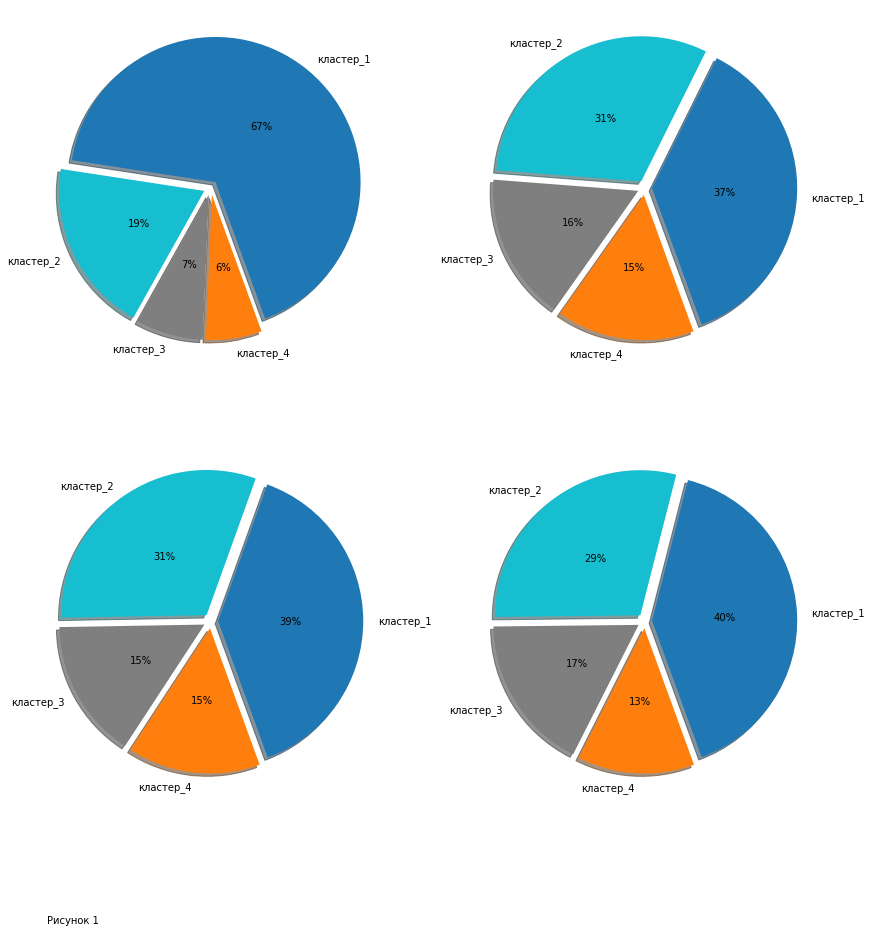

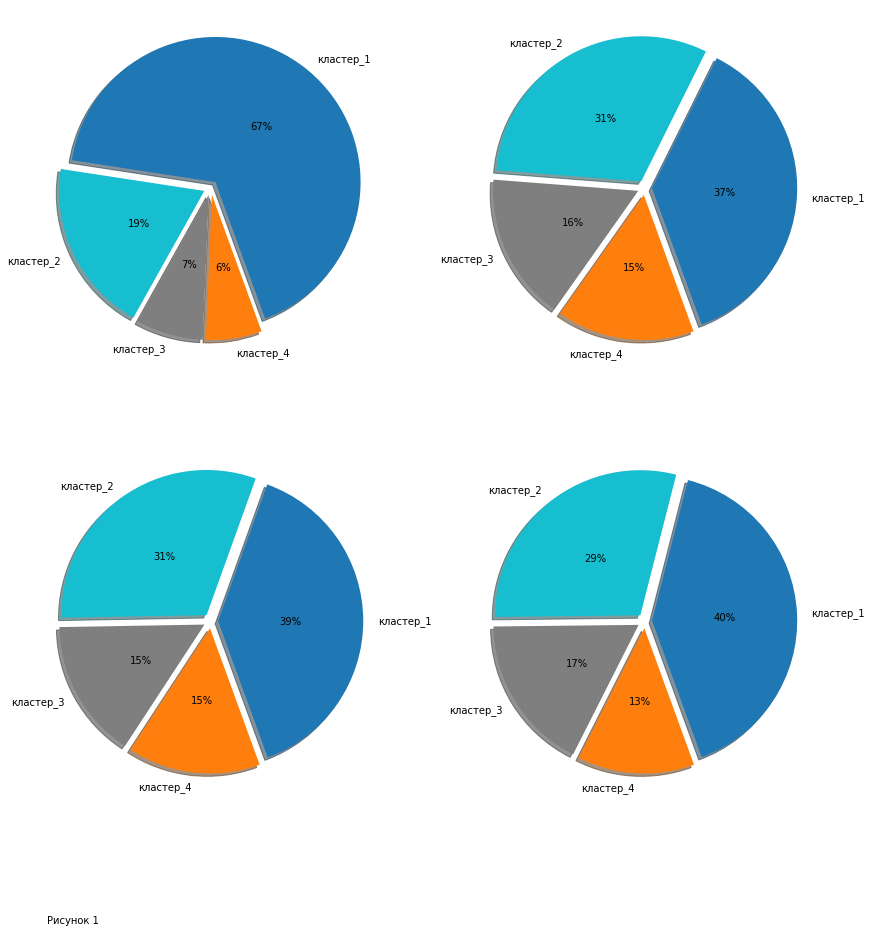

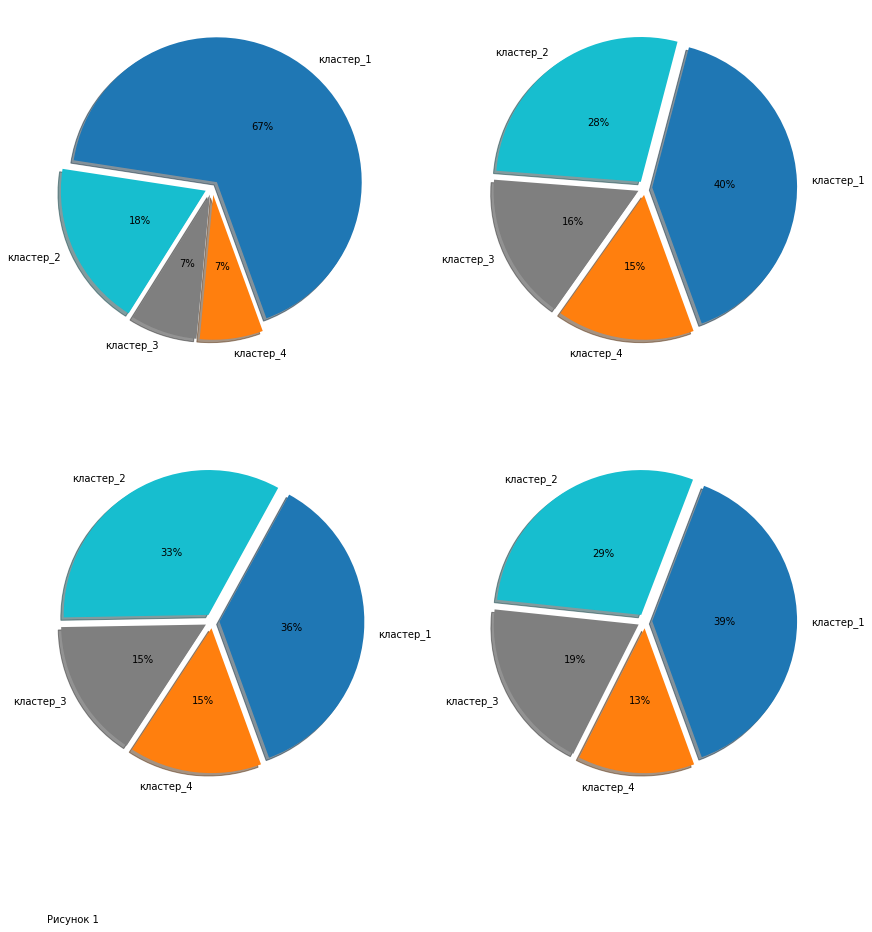

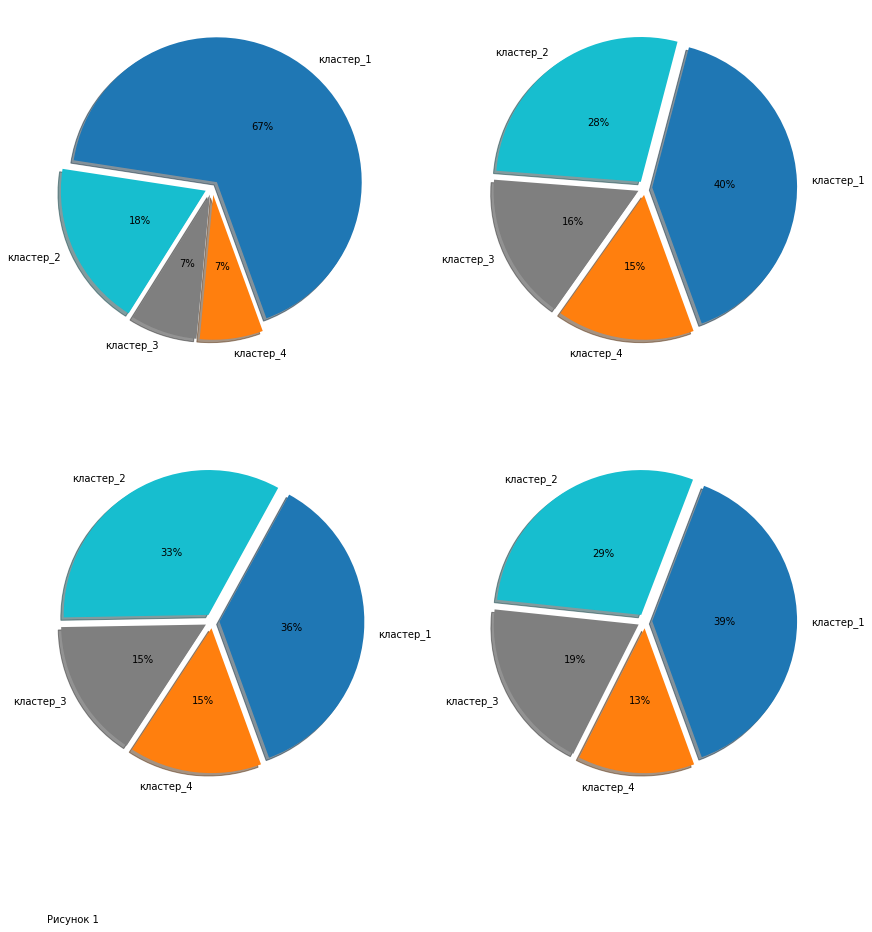

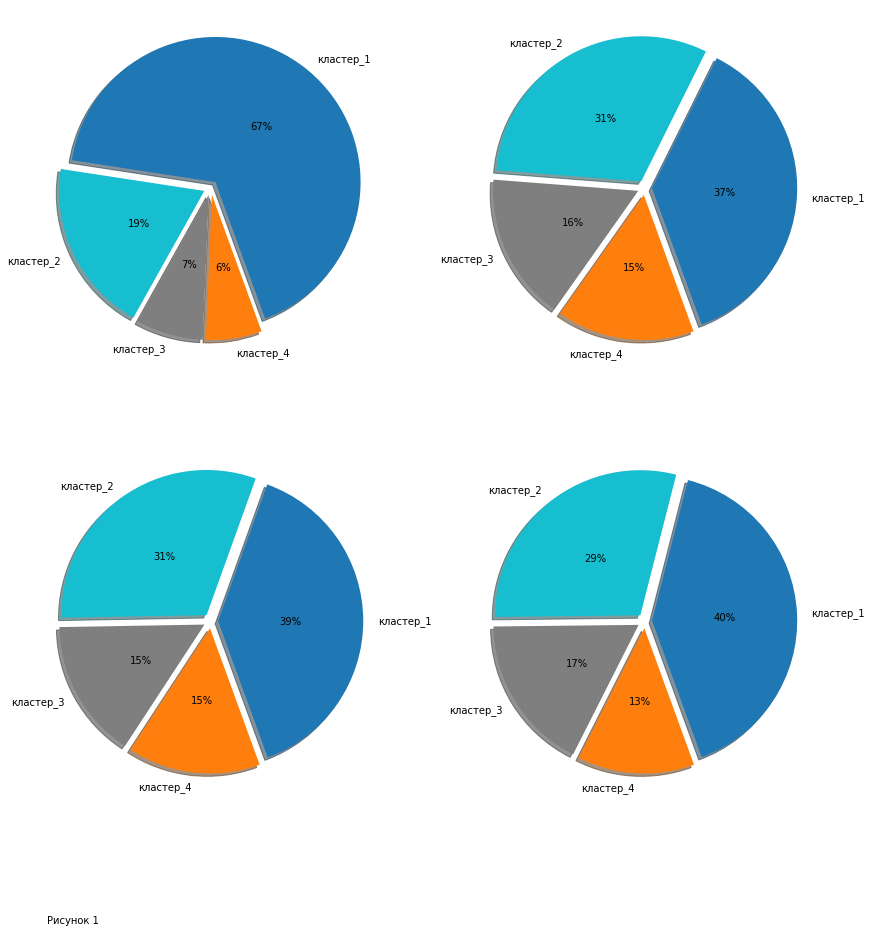

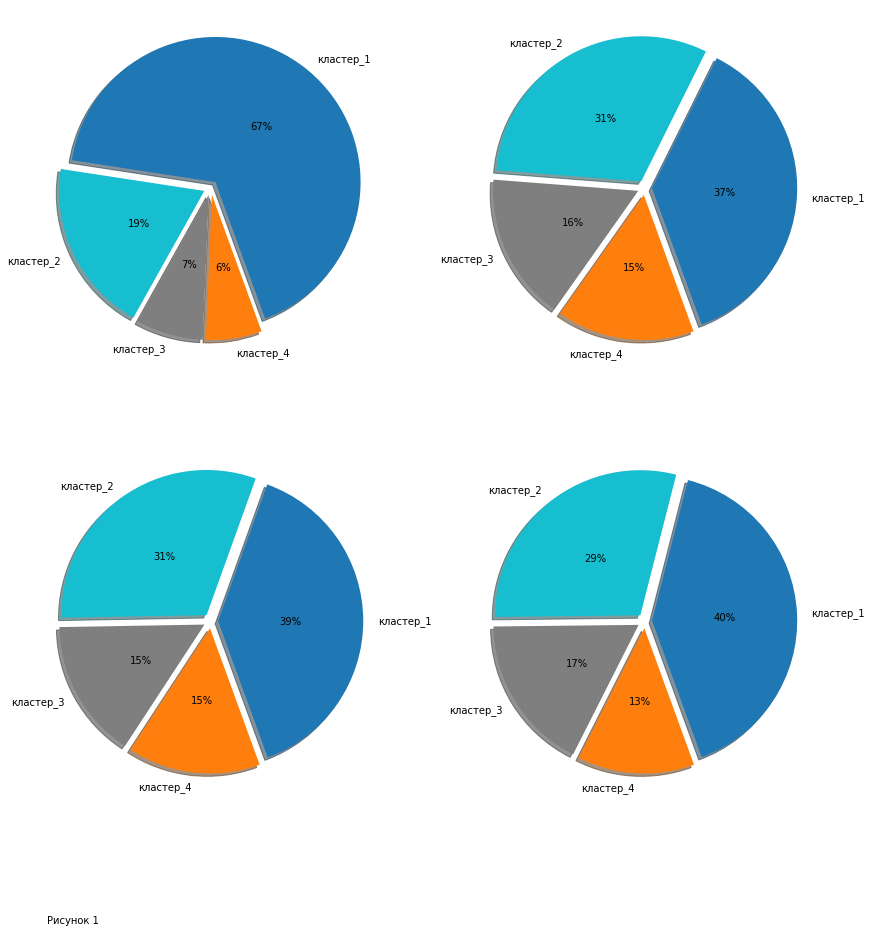

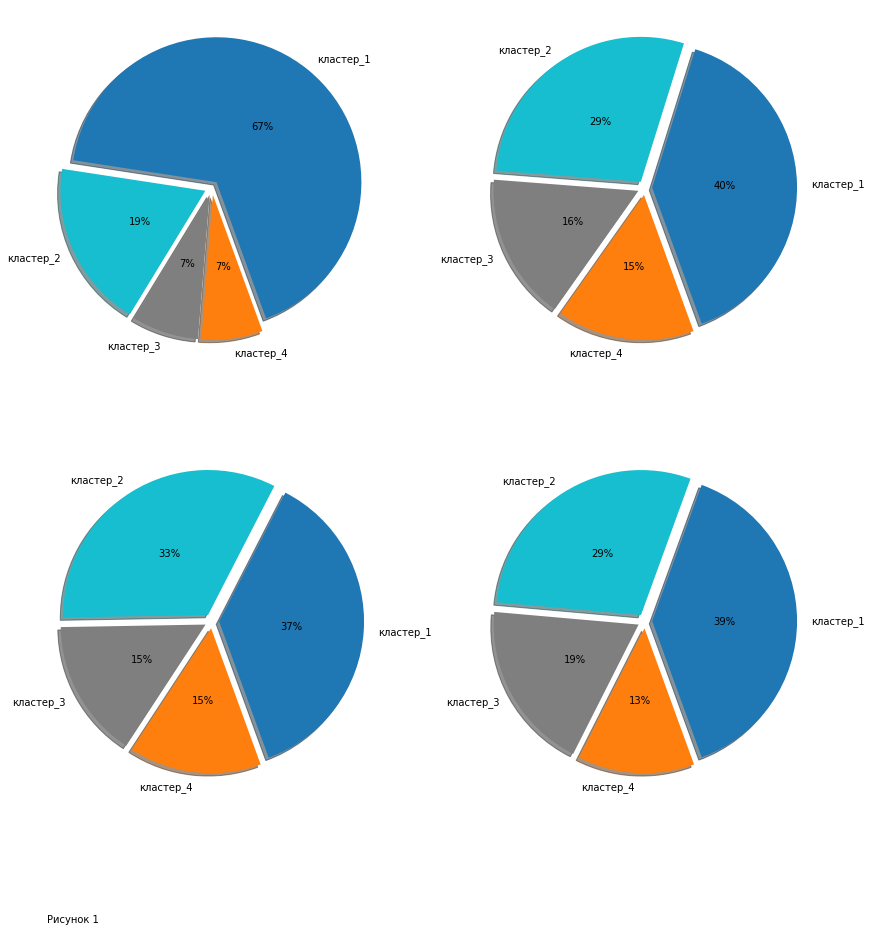

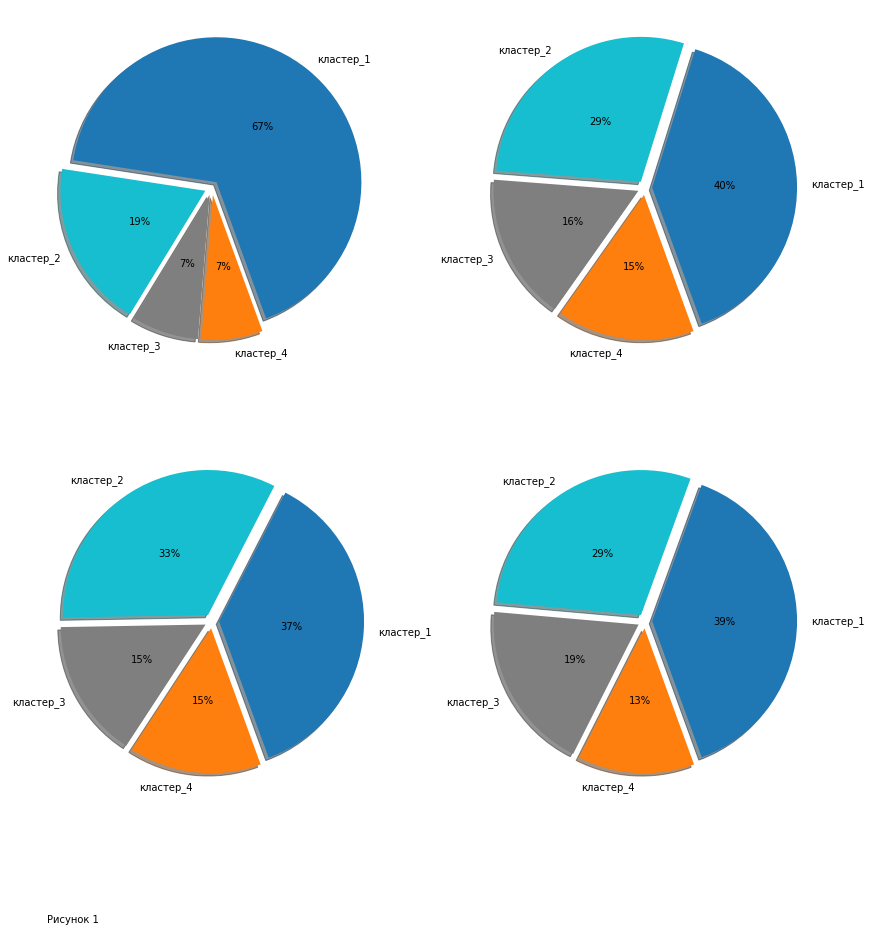

In [28]:
df_KA_knn = df
for i in lst_1:
# выбираем лучших k-признаков   
    test=SelectKBest(score_func=f_classif, k=i)
    fit=test.fit(X,Y)
    features=fit.transform(X)
# кластерный анализ, метод KNN        
    model = KMeans(n_clusters=4)
    result = model.fit(features)
    all_predictions = model.predict(features)
#      for j in range[1,5]:
    df_KA_knn['KA_knn'] = pd.Series(all_predictions, index=df_KA_knn.index)
    fg = plt.figure(figsize=(12,12),constrained_layout=True) # задаем рамку
    gs = fg.add_gridspec(2,2) # задаем квадраты в рамке
    q = fg.add_subplot(gs[0,0]) # задаем рамку для таблицы

    data = df_KA_knn[df_KA_knn['Целевая_категория'] == 4]['KA_knn'].value_counts()
    labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

    # Настройка цветовой гаммы
    colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

    # Рендеринг круговой диаграммы
    g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
            labels=labels, pctdistance=0.5, shadow =True, startangle = 290
           )
    # Название рисунка
    plt.figtext(0.05, -0.1, 'Рисунок 1')

    #_________________________________________________________________________________________
    q = fg.add_subplot(gs[0,1]) # задаем рамку для таблицы

    data = df_KA_knn[df_KA_knn['Целевая_категория'] == 3]['KA_knn'].value_counts()
    labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

    # Настройка цветовой гаммы
    colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

    # Рендеринг круговой диаграммы
    g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
            labels=labels, pctdistance=0.5, shadow =True, startangle = 290
           )

    # Название рисунка


    #_________________________________________________________________________________________
    q = fg.add_subplot(gs[1,0]) # задаем рамку для таблицы

    data = df_KA_knn[df_KA_knn['Целевая_категория'] == 2]['KA_knn'].value_counts()
    labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

    # Настройка цветовой гаммы
    colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

    # Рендеринг круговой диаграммы
    g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
            labels=labels, pctdistance=0.5, shadow =True, startangle = 290
           )

    # Название рисунка


    #_________________________________________________________________________________________
    q = fg.add_subplot(gs[1,1]) # задаем рамку для таблицы

    data = df_KA_knn[df_KA_knn['Целевая_категория'] == 1]['KA_knn'].value_counts()
    labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

    # Настройка цветовой гаммы
    colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

    # Рендеринг круговой диаграммы
    g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
            labels=labels, pctdistance=0.5, shadow =True, startangle = 290
           )


# **2. Иерархическая кластеризация**

In [27]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Реализация иерархической кластеризации при помощи функции linkage
link = linkage(X, 'ward', 'euclidean')

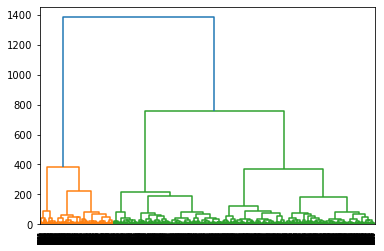

In [29]:
dn = dendrogram(link)

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# **2. Иерархическая кластеризация**

In [10]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Реализация иерархической кластеризации при помощи функции linkage
link = linkage(X, 'ward', 'euclidean')

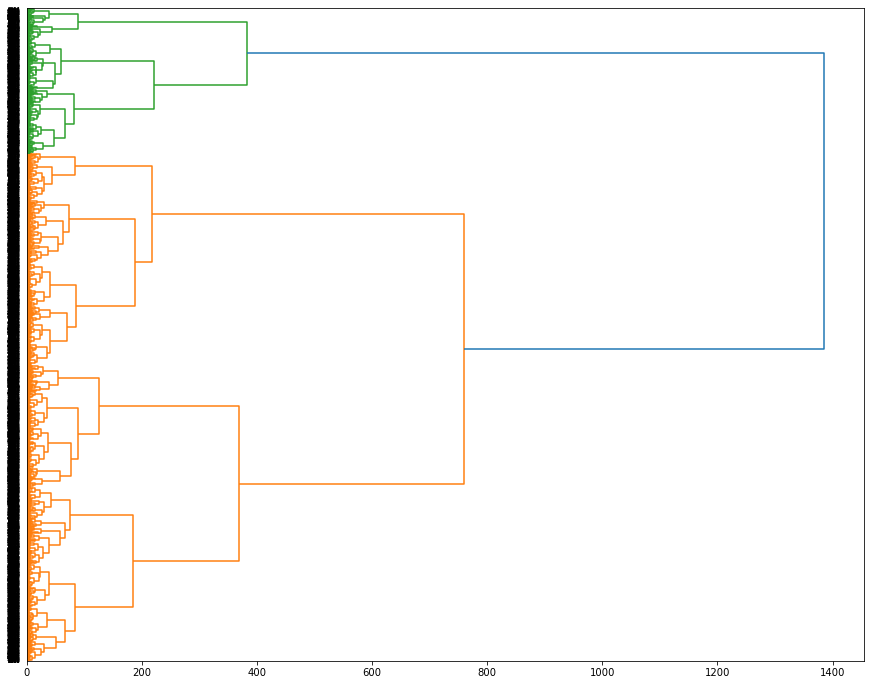

In [30]:
plt.figure(figsize=(15, 12))
dn = dendrogram(link,orientation='right',
            
            distance_sort='descending',
            show_leaf_counts=False)

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
df_KA_knn = df

In [32]:
df_KA_knn['cluster'] = fcluster(link, 4, criterion='maxclust')

In [33]:
df_KA_knn['KA_knn'] = pd.Series(all_predictions, index=df_KA_knn.index)

In [34]:
df_KA_knn

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория,KA_knn,cluster
0,0,1.0,67,1.0,4.0,1.0,3,1.0,6.0,2,2,2
1,0,0.0,26,1.0,4.0,1.0,3,3.0,6.0,1,1,3
2,1,0.0,19,0.0,2.0,4.0,3,4.0,4.0,4,1,3
3,0,1.0,58,0.0,5.0,0.0,3,1.0,3.0,2,0,2
4,0,0.0,41,0.0,2.0,1.0,3,2.0,1.0,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5722,1,1.0,65,0.0,1.0,0.0,2,2.0,6.0,3,2,2
5723,1,1.0,41,1.0,1.0,0.0,1,5.0,6.0,2,3,4
5724,1,0.0,35,0.0,7.0,3.0,3,4.0,4.0,4,3,4
5725,0,0.0,27,1.0,2.0,1.0,3,4.0,6.0,2,1,3


In [35]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 4].cluster.value_counts()

3    989
4    346
2     88
1     54
Name: cluster, dtype: int64

In [36]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 3].cluster.value_counts()

4    707
2    377
3    226
1     65
Name: cluster, dtype: int64

In [37]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 2].cluster.value_counts()

4    779
2    344
3    218
1     66
Name: cluster, dtype: int64

In [38]:
df_KA_knn[df_KA_knn['Целевая_категория'] == 1].cluster.value_counts()

4    762
3    430
2    182
1     94
Name: cluster, dtype: int64

In [39]:
df_KA_knn.corr()

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория,KA_knn,cluster
Пол,1.000000,0.121476,0.041163,-0.038800,0.017382,-0.046994,-0.082643,0.042223,0.030327,0.028974,-0.027707,-0.040308
Семейное_положение,0.121476,1.000000,0.538872,0.160518,0.069743,-0.095241,-0.603122,-0.067337,0.090149,-0.189418,0.030625,-0.086427
Возраст,0.041163,0.538872,1.000000,0.218378,0.140694,-0.201847,-0.397435,-0.255125,0.167730,-0.198572,-0.044177,-0.511548
Высшее_образование,-0.038800,0.160518,0.218378,1.000000,-0.207427,0.033608,-0.084298,-0.214478,0.113635,-0.148899,0.063549,0.093150
Профессия,0.017382,0.069743,0.140694,-0.207427,1.000000,-0.001596,-0.170240,0.008810,0.005826,0.021735,0.015508,-0.165594
Опыт_работы,-0.046994,-0.095241,-0.201847,0.033608,-0.001596,1.000000,0.068124,-0.073284,0.054992,0.028654,0.117919,0.154666
Уровень_расходов,-0.082643,-0.603122,-0.397435,-0.084298,-0.170240,0.068124,1.000000,-0.115591,-0.078837,0.083780,-0.011249,0.117794
Размер_семьи,0.042223,-0.067337,-0.255125,-0.214478,0.008810,-0.073284,-0.115591,1.000000,-0.130302,0.176980,-0.138525,0.058708
Анонимная_категория,0.030327,0.090149,0.167730,0.113635,0.005826,0.054992,-0.078837,-0.130302,1.000000,-0.024727,-0.001804,-0.089254
Целевая_категория,0.028974,-0.189418,-0.198572,-0.148899,0.021735,0.028654,0.083780,0.176980,-0.024727,1.000000,-0.120461,-0.072050


# **Графическа часть соответствия:**

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

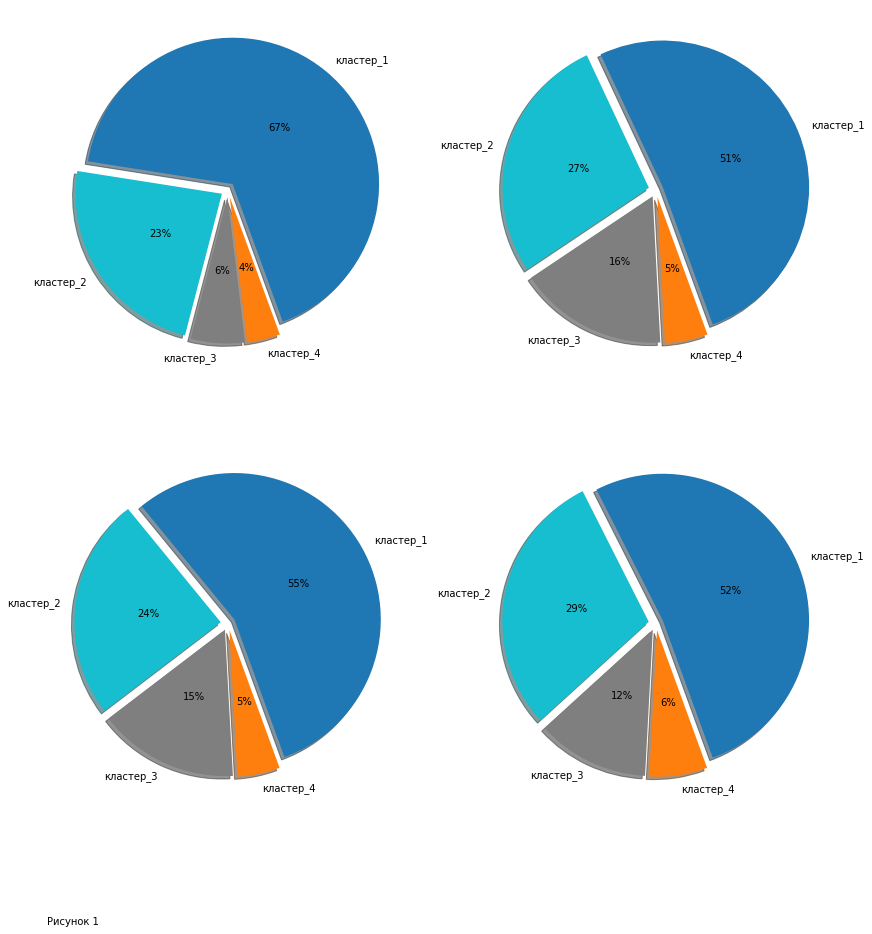

In [41]:
fg = plt.figure(figsize=(12,12),constrained_layout=True) # задаем рамку
gs = fg.add_gridspec(2,2) # задаем квадраты в рамке
q = fg.add_subplot(gs[0,0]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 4].cluster.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )
# Название рисунка
plt.figtext(0.05, -0.1, 'Рисунок 1')

#_________________________________________________________________________________________
q = fg.add_subplot(gs[0,1]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 3].cluster.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


#_________________________________________________________________________________________
q = fg.add_subplot(gs[1,0]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 2].cluster.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


#_________________________________________________________________________________________
q = fg.add_subplot(gs[1,1]) # задаем рамку для таблицы

data = df_KA_knn[df_KA_knn['Целевая_категория'] == 1].cluster.value_counts()
labels = ['кластер_1', 'кластер_2', 'кластер_3', 'кластер_4']

# Настройка цветовой гаммы
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'] 

# Рендеринг круговой диаграммы
g = plt.pie(data, colors = colors, autopct='%.0f%%',explode=[0.05]*4, 
        labels=labels, pctdistance=0.5, shadow =True, startangle = 290
       )

# Название рисунка


# **3. Понижение размерности с методом t-SNE**

In [53]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [54]:
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

In [55]:
transformed = model.fit_transform(X)

In [56]:
# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

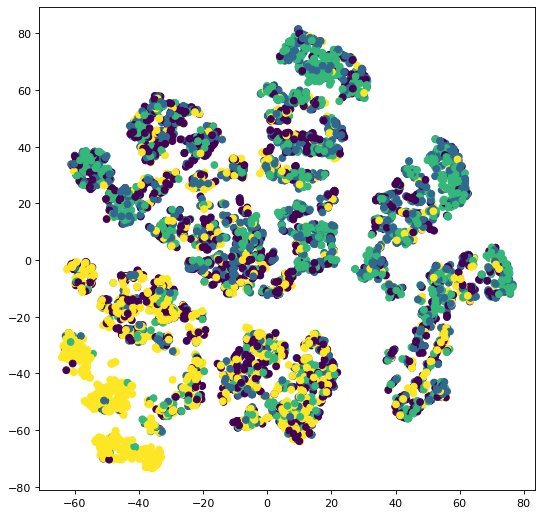

In [59]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x_axis, y_axis, c=Y)
plt.show()

# **Метод кластеризации на основе плотности DBSCAN**

In [61]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [62]:
# Определяем модель
dbscan = DBSCAN()

In [63]:
# Обучаем
dbscan.fit(X)

DBSCAN()

In [74]:
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

In [75]:
pd.Series(dbscan.labels_).unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

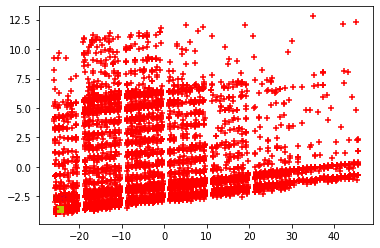

In [76]:
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == -1:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 3:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 9:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == 15:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='s')